In [1]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import pickle as pkl
import notebook_helper
import sys
from mprompt.modules import fmri
import seaborn as sns
from mprompt.data.data import TASKS_D3
import numpy as np
from scipy.special import softmax

### visualize data matrix

In [9]:
fname = '../results/mean_preds_matrix_d3___facebook__opt-iml-max-30b.pkl'
# mat = pkl.load(open('../results/mean_preds_matrix_d3.pkl', 'rb'))
mat = pkl.load(open(fname, 'rb'))
m = softmax(mat, axis=1)
n = m.shape[0]

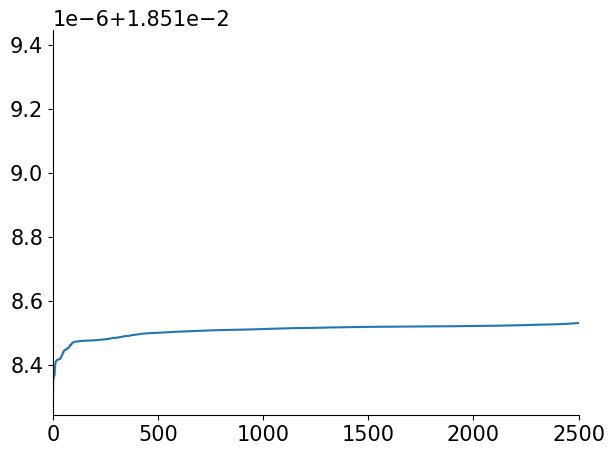

In [6]:
# plt.hist(m.flatten())
# plt.xscale('log')
plt.plot(np.sort(m.flatten()))
plt.xlim((0, 2500))
plt.show()

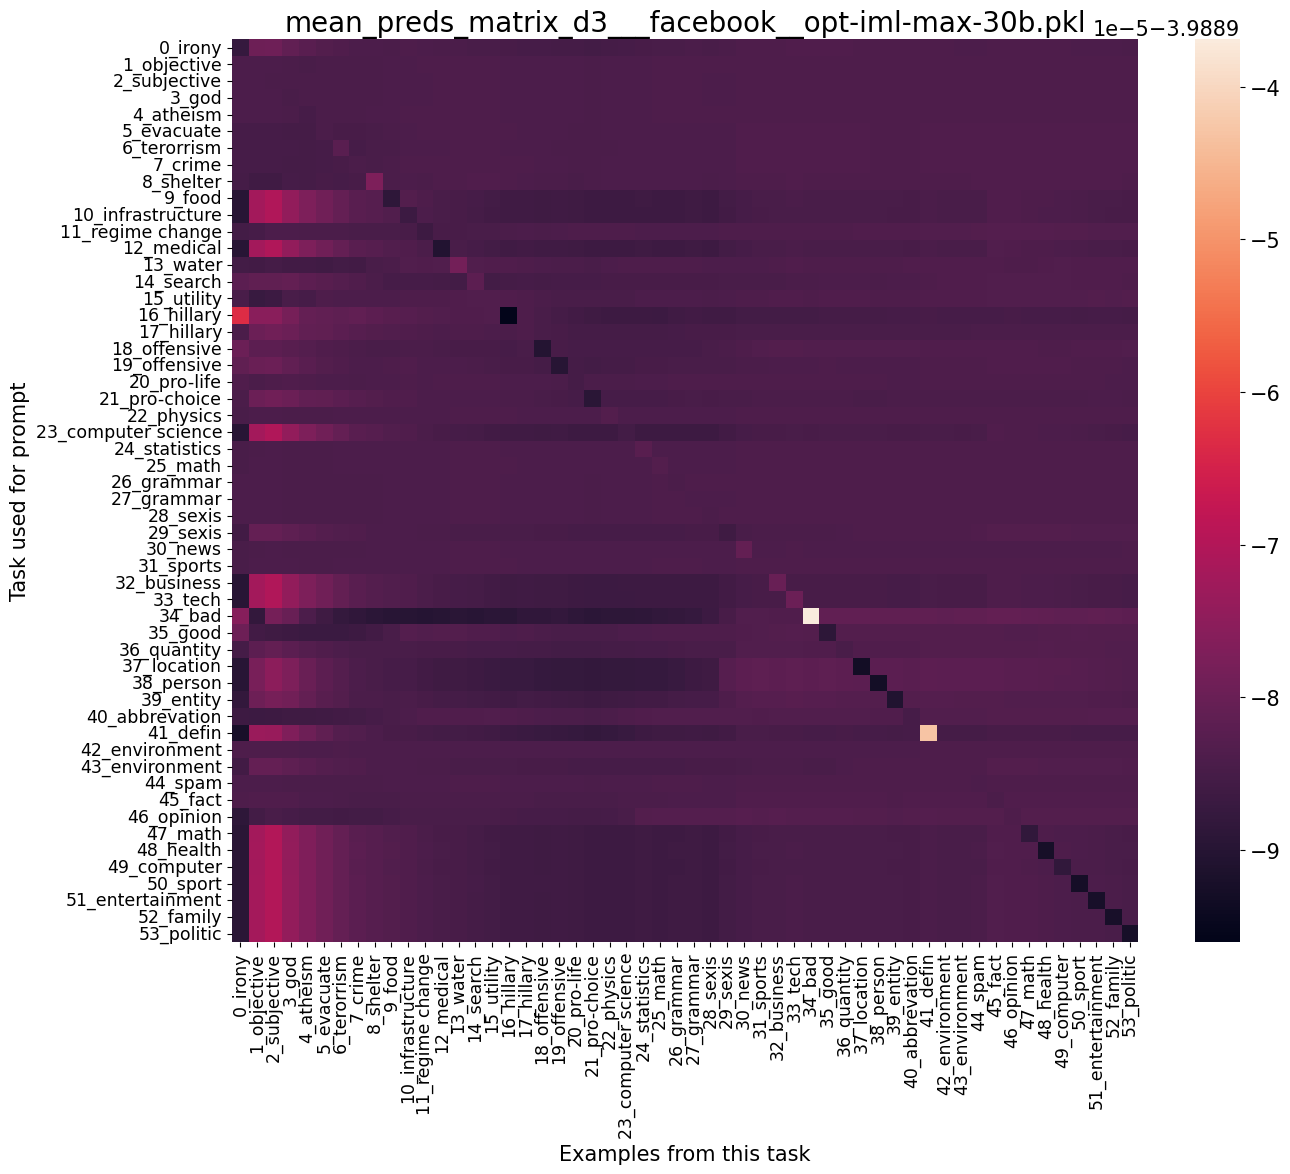

In [11]:
mp = m
# divide each row by its max value
# mp = mp / (np.max(mp, axis=1).reshape(-1, 1))
# mp = mp / (np.max(mp, axis=0).T)
mp = np.log(mp)

plt.figure(figsize=(14, 12))
plt.title(os.path.basename(fname))
sns.heatmap(mp)
labs = list(map(lambda x: x[3:], list(TASKS_D3.keys())))
plt.ylabel('Task used for prompt')
plt.xlabel('Examples from this task')
plt.yticks(np.arange(len(TASKS_D3)) + 0.5, labels=labs, rotation='horizontal', fontsize='small')
plt.xticks(np.arange(len(TASKS_D3)) + 0.5, labels=labs, rotation='vertical', fontsize='small')
plt.show()